<a href="https://colab.research.google.com/github/JDVVd/Class_DeeplearningforAI/blob/main/practice(3_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The mathematical building blocks of neural networks

## A first look at a neural network

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")/255

**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2037 - accuracy: 0.9421
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2000 - accuracy: 0.9430
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9448
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1927 - accuracy: 0.9452
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1891 - accuracy: 0.9466


**Using the model to make predictions**

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 62ms/step


array([9.3130993e-08, 6.5835920e-11, 1.8033670e-06, 1.4988375e-05,
       2.3064159e-12, 6.3885849e-08, 4.1788074e-13, 9.9998260e-01,
       3.8530498e-08, 2.8894760e-07], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.9999826

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1861 - accuracy: 0.9459
test_acc: 0.945900022983551


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

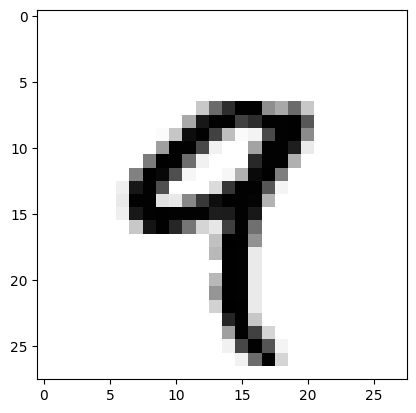

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in NumPy

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]